In [57]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Quick tutorial

In [4]:
my_data = pd.read_csv("FacebookNarcissism.csv")
my_data.head()

,id,NPQC_R_Total,Rating_Type,Rating
0,1,31.0,Attractive,2
1,1,31.0,Fashionable,2
2,1,31.0,Glamourous,2
3,1,31.0,Cool,2
4,2,37.0,Attractive,2


In [49]:
my_data['Rating_Type'].value_counts()
colors = {"Attractive": 'blue', "Fashionable":'green', "Glamourous":'red', 'Cool':'purple'}
my_data['Color'] = my_data['Rating_Type'].map(colors)

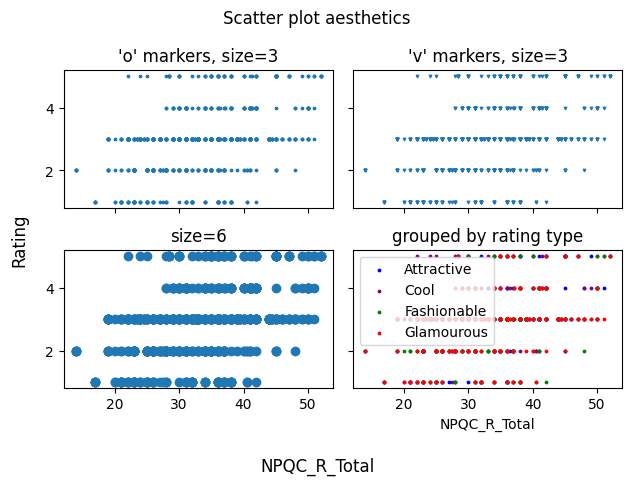

In [82]:
# create empty figures where we'll populate the graphs
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax[0, 0].scatter(my_data["NPQC_R_Total"], my_data["Rating"], marker='o', s=3)
ax[0, 1].scatter(my_data["NPQC_R_Total"], my_data["Rating"], marker='v', s=3)
ax[1, 0].scatter(my_data["NPQC_R_Total"], my_data["Rating"])

grouped = my_data.groupby("Rating_Type")
for key, group in grouped:
    group.plot(
        ax=ax[1, 1],
        kind="scatter",
        x="NPQC_R_Total",
        y="Rating",
        label=key,
        color=colors[key],
        s=3
    )

ax[0, 0].set_title("'o' markers, size=3")
ax[0, 1].set_title("'v' markers, size=3")
ax[1, 0].set_title("size=6")
ax[1, 1].set_title("grouped by rating type")

plt.suptitle("Scatter plot aesthetics")
fig.supxlabel("NPQC_R_Total")
fig.supylabel("Rating")

fig.tight_layout()
plt.show()

## Scatterplots

In [85]:
examData = pd.read_csv("Exam Anxiety.csv")
examData.head()

,Code,Revise,Exam,Anxiety,Gender
0,1,4,40,86.298,Male
1,2,11,65,88.716,Female
2,3,27,80,70.178,Male
3,4,53,80,61.312,Male
4,5,4,40,89.522,Male


Simple Scatterplot

Text(0.5, 0, 'Anxiety')

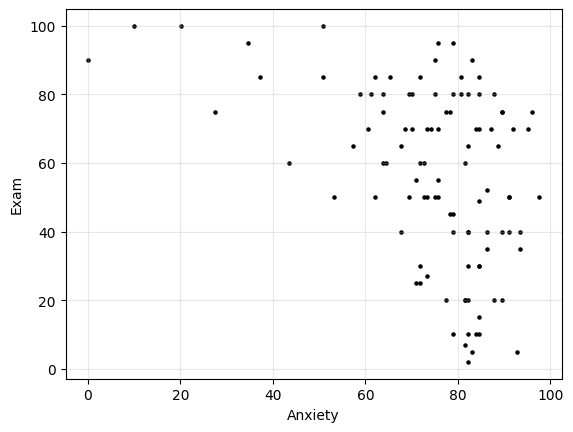

In [96]:
fig, ax = plt.subplots()
ax.grid(alpha=0.3)
ax.scatter(examData['Anxiety'], examData['Exam'], s=5,color='black')
ax.set_ylabel("Exam")
ax.set_xlabel("Anxiety")

Scatterplot with smooth

(0.0, 130.0)

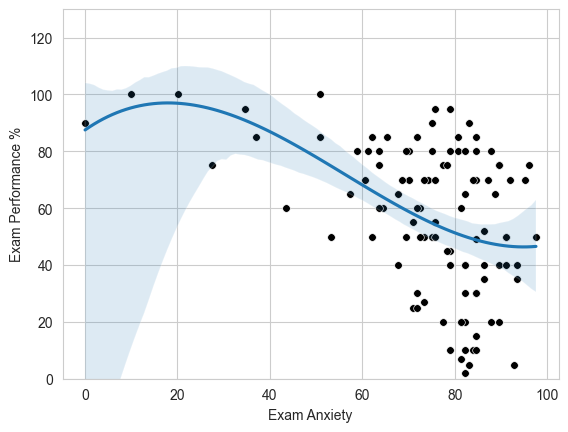

In [114]:
import seaborn as sns

# create scatterplot with regression line and confidence interval lines
sns.set_style("whitegrid")


sns.scatterplot(
    x=examData["Anxiety"], y=examData["Exam"], color="black", s=30  # Change dot color
)  # Change dot size

sns.regplot(
    x=examData["Anxiety"],
    y=examData["Exam"],
    order=3,
    scatter=False)

plt.xlabel("Exam Anxiety")
plt.ylabel("Exam Performance %")
plt.ylim(0, 130)

Simple scatter with regression line

(0.0, 130.0)

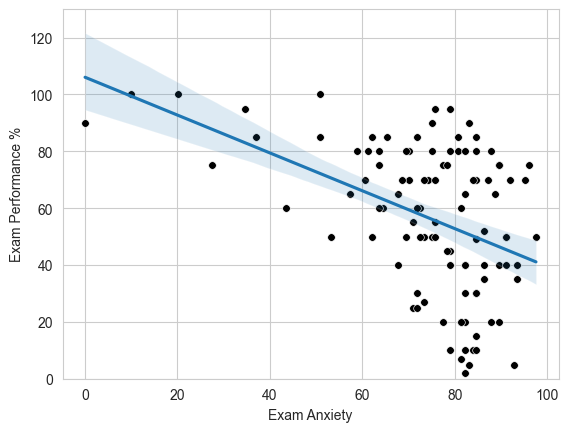

In [117]:
sns.set_style("whitegrid")

sns.scatterplot(
    x=examData["Anxiety"], y=examData["Exam"], color="black", s=30  # Change dot color
)  # Change dot size

sns.regplot(x=examData["Anxiety"], y=examData["Exam"], order=1, scatter=False)

plt.xlabel("Exam Anxiety")
plt.ylabel("Exam Performance %")
plt.ylim(0, 130)

Grouped scatterplot

(0.0, 130.0)

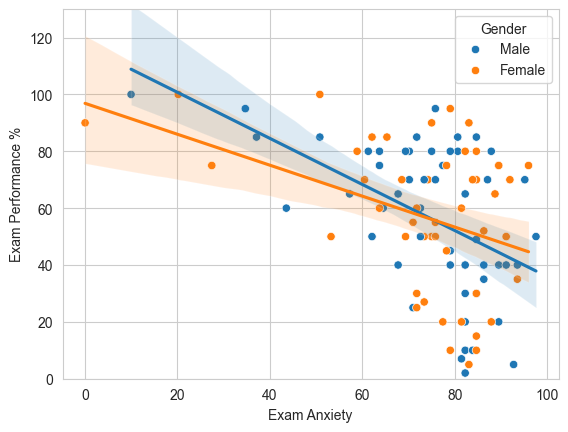

In [128]:
# style
sns.set_style("whitegrid")

# scatterplot
sns.scatterplot(data=examData, x='Anxiety', y='Exam', hue='Gender')

# regplot
sns.regplot(data=examData[examData['Gender'] == 'Male'], x='Anxiety', y='Exam',  scatter=False)
sns.regplot(data=examData[examData['Gender'] == 'Female'], x="Anxiety", y="Exam", scatter=False)

# labels
plt.xlabel("Exam Anxiety")
plt.ylabel("Exam Performance %")
plt.ylim(0, 130)

## Self-test
- Go back to the Facebook narcissism data.
- Plot a graph that shows the pattern in the data using only a line.
- Plot different coloured lines for the different types of rating (cool, fashionable, attractive, glamorous).
- Add a layer displaying the raw data as points.
- Add labels to the axes.

<Axes: xlabel='NPQC_R_Total', ylabel='Rating'>

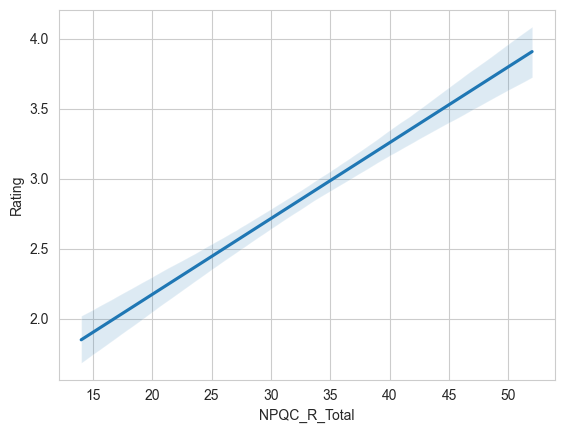

In [133]:
sns.regplot(data=my_data, x="NPQC_R_Total", y="Rating", scatter=False)

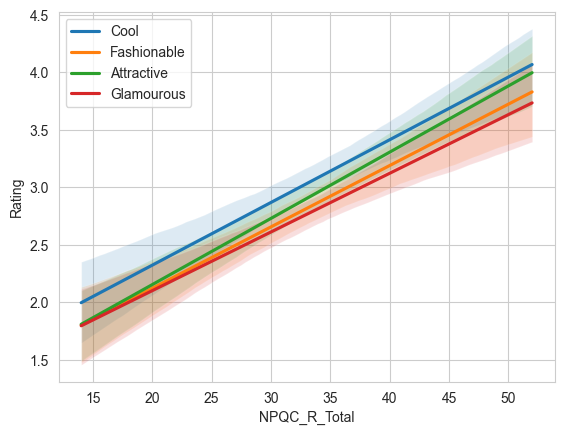

In [142]:
sns.regplot(data=my_data[my_data['Rating_Type'] == 'Cool'], x="NPQC_R_Total", y="Rating", scatter=False, label='Cool')
sns.regplot(data=my_data[my_data['Rating_Type'] == 'Fashionable'], x="NPQC_R_Total", y="Rating", scatter=False, label='Fashionable')
sns.regplot(data=my_data[my_data['Rating_Type'] == 'Attractive'], x="NPQC_R_Total", y="Rating", scatter=False, label='Attractive')
sns.regplot(data=my_data[my_data['Rating_Type'] == 'Glamourous'], x="NPQC_R_Total", y="Rating", scatter=False, label='Glamourous')
plt.legend()

Text(0, 0.5, 'Rating')

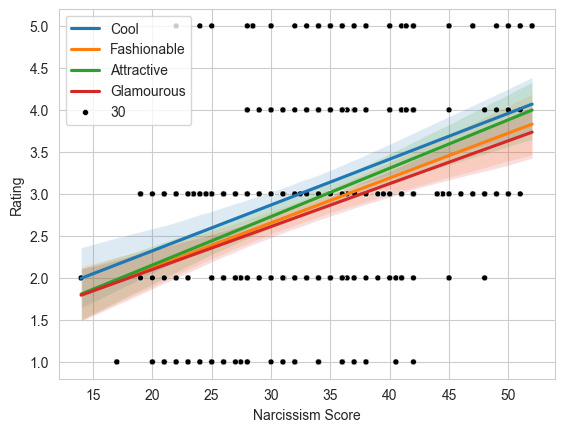

In [144]:
# colored lines by rating
sns.regplot(data=my_data[my_data['Rating_Type'] == 'Cool'], x="NPQC_R_Total", y="Rating", scatter=False, label='Cool')
sns.regplot(data=my_data[my_data['Rating_Type'] == 'Fashionable'], x="NPQC_R_Total", y="Rating", scatter=False, label='Fashionable')
sns.regplot(data=my_data[my_data['Rating_Type'] == 'Attractive'], x="NPQC_R_Total", y="Rating", scatter=False, label='Attractive')
sns.regplot(data=my_data[my_data['Rating_Type'] == 'Glamourous'], x="NPQC_R_Total", y="Rating", scatter=False, label='Glamourous')
plt.legend()

# raw data
sns.scatterplot(data=my_data, x="NPQC_R_Total", y="Rating", color='black', size=30)

plt.xlabel('Narcissism Score')
plt.ylabel('Rating')

## Histograms

In [212]:
festivalData = pd.read_csv("DownloadFestival.csv")
festivalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticknumb  810 non-null    int64  
 1   gender    810 non-null    object 
 2   day1      810 non-null    float64
 3   day2      264 non-null    float64
 4   day3      123 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 31.8+ KB


<Axes: xlabel='day1', ylabel='Count'>

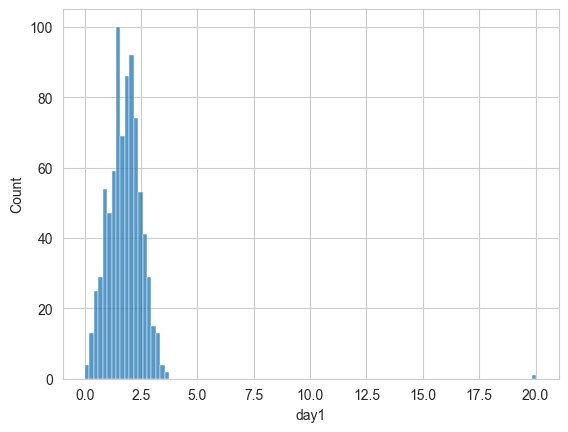

In [174]:
sns.histplot(data= festivalData, x='day1')

Self test: remove the ourlier and replot the histogram

<Axes: xlabel='day1', ylabel='Count'>

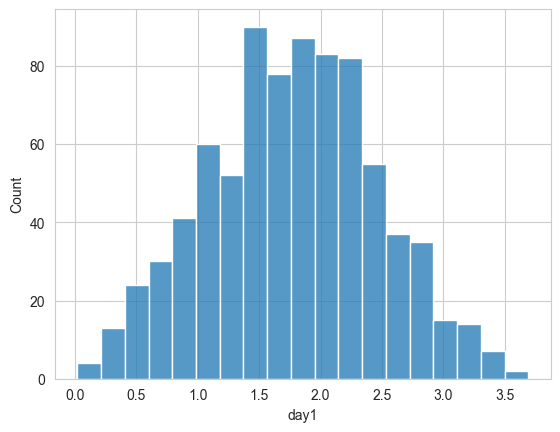

In [216]:
no_outlier = festivalData[festivalData['day1'] < 5]
sns.histplot(data=no_outlier, x="day1")

Using z-scores to find outliers

In [217]:
# mean of 0
def outlier_summary(target_column):
    new_col = ((
        target_column - target_column.mean()
    ) / target_column.std()).dropna()

    d_196 = new_col[abs(new_col) > 1.96]
    d_258 = new_col[abs(new_col) > 2.58]
    d_329 = new_col[abs(new_col) > 3.29]

    greater_196 = round(len(d_196) / len(new_col) * 100, 2)
    greater_258 = round(len(d_258) / len(new_col) * 100, 2)
    greater_329 = round(len(d_329) / len(new_col) * 100, 2)

    print("Absolute z-score greater than 1.96 =", greater_196, "%") 
    print("Absolute z-score greater than 2.58 =", greater_258, "%")
    print("Absolute z-score greater than 3.29 =", greater_329, "%")


outlier_summary(festivalData["day2"])

Absolute z-score greater than 1.96 = 6.82 %
Absolute z-score greater than 2.58 = 2.27 %
Absolute z-score greater than 3.29 = 0.76 %


<Axes: xlabel='gender', ylabel='day1'>

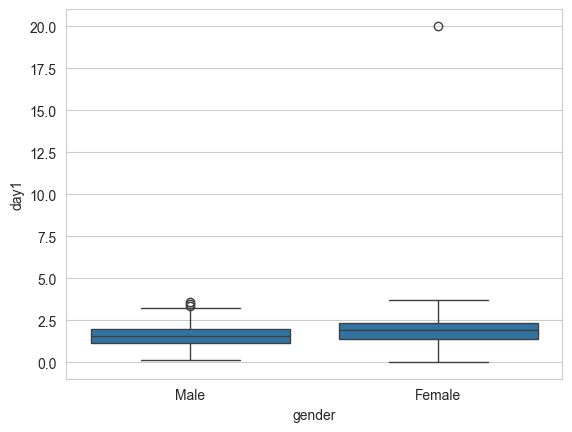

In [218]:
sns.boxplot(data=festivalData, x='gender', y='day1')

<Axes: xlabel='gender', ylabel='day1'>

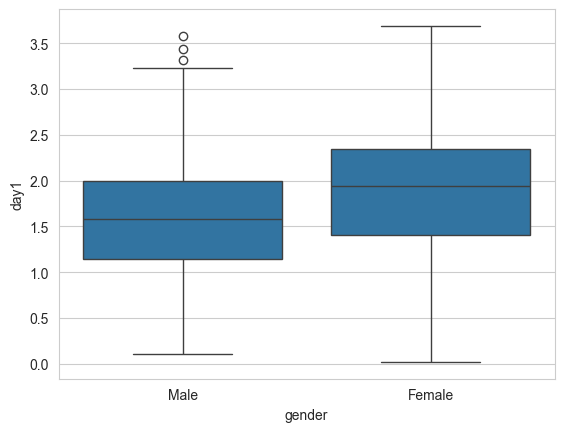

In [219]:
sns.boxplot(data=no_outlier, x='gender', y='day1')

## Self-test
Produce boxplots for the day 2 and day 3 hygiene scores and interpret them.


<Axes: xlabel='gender', ylabel='day2'>

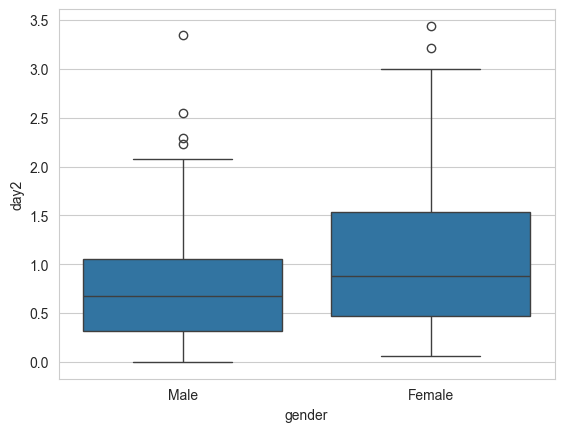

In [222]:
sns.boxplot(data=no_outlier, x='gender', y='day2')

<Axes: xlabel='gender', ylabel='day3'>

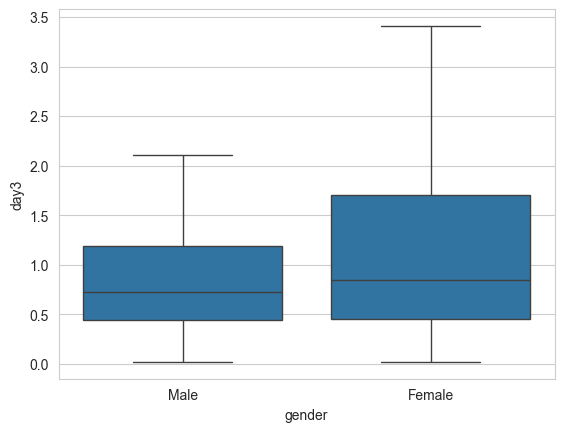

In [223]:
sns.boxplot(data=no_outlier, x="gender", y="day3")

<Axes: xlabel='day1', ylabel='Density'>

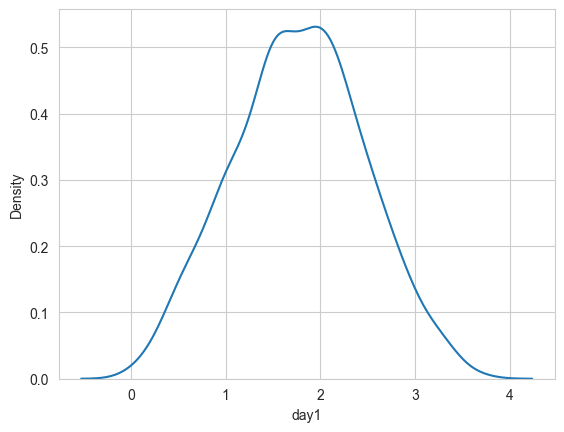

In [225]:
sns.kdeplot(data=no_outlier, x='day1')

# Graphing means

## bar charts and error bars

In [227]:
filmData = pd.read_csv('ChickFlick.csv')
filmData.head()

,gender,film,arousal
0,Male,Bridget Jones' Diary,22
1,Male,Bridget Jones' Diary,13
2,Male,Bridget Jones' Diary,16
3,Male,Bridget Jones' Diary,10
4,Male,Bridget Jones' Diary,18


<Axes: xlabel='film', ylabel='arousal'>

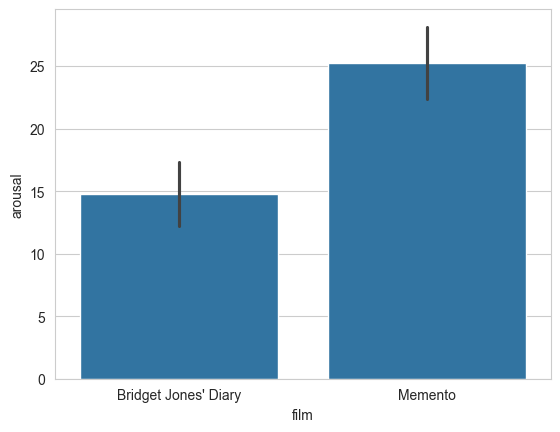

In [228]:
sns.barplot(data=filmData, x='film', y='arousal')

### SELF-TEST
Change the geom for the errorbar to ‘errorbar’ and change its colour to red. Replot the graph.


<Axes: xlabel='film', ylabel='arousal'>

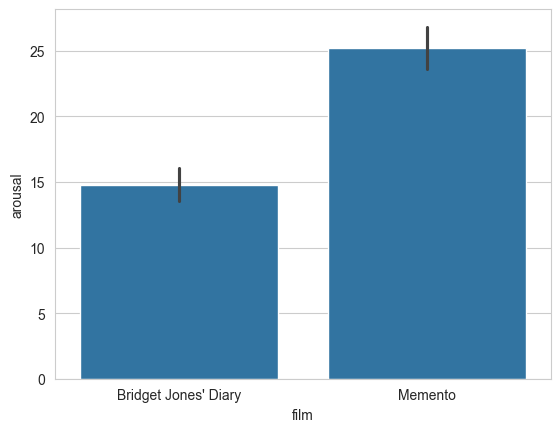

In [231]:
sns.barplot(data=filmData, x="film", y="arousal", errorbar='se')

### SELF-TEST
Plot the graph again but with bootstrapped confidence intervals.

<Axes: xlabel='film', ylabel='arousal'>

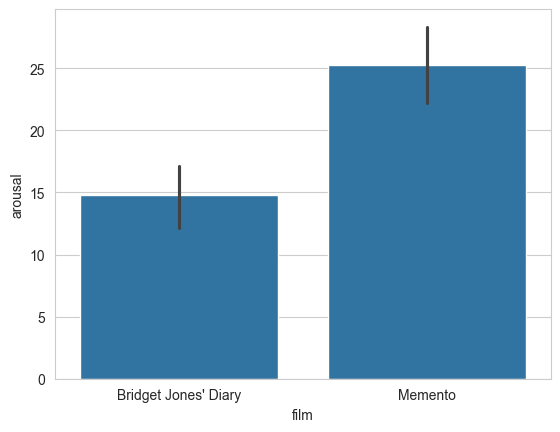

In [232]:
sns.barplot(data=filmData, x="film", y="arousal", errorbar="ci")

<Axes: xlabel='film', ylabel='arousal'>

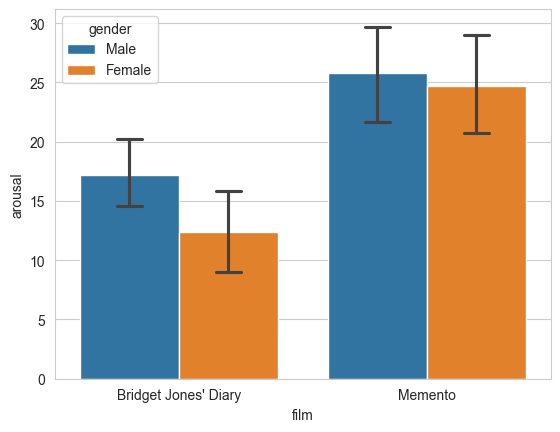

In [239]:
sns.barplot(
    data=filmData,
    x="film",
    y="arousal",
    hue="gender",
    errorbar="ci",
    capsize=0.2,
)

## Line graphs

In [243]:
hiccups = pd.read_csv("Hiccups.csv")
hiccups = hiccups.melt(value_vars=('Baseline', 'Tongue', 'Carotid', 'Rectum'),
                       value_name='hiccups',
                       var_name='intervention')
hiccups.head()

,intervention,hiccups
0,Baseline,15
1,Baseline,13
2,Baseline,9
3,Baseline,7
4,Baseline,11


<Axes: xlabel='intervention', ylabel='hiccups'>

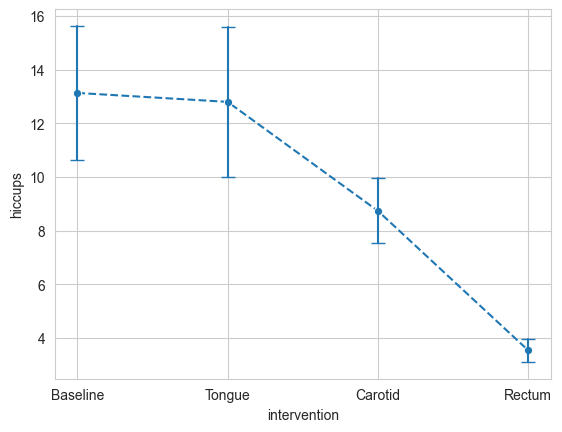

In [260]:
sns.lineplot(
    data=hiccups,
    x="intervention",
    y="hiccups",
    marker="o",
    linestyle="--",
    err_style="bars",
    errorbar=("se", 2),
    err_kws={"capsize": 5}
)